In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

print("⏳ Downloading California housing dataset... please wait...")

california = fetch_california_housing(as_frame=True)  # downloads & converts to DataFrame
df = california.frame

print("✅ Dataset loaded successfully!")
df.head()


⏳ Downloading California housing dataset... please wait...
✅ Dataset loaded successfully!


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:

# 3️⃣ Select features and target
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 
        'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal']

# 4️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
print(df['MedHouseVal'].min(), df['MedHouseVal'].max())

0.14999 5.00001


In [13]:
# Scale target from 0.14999–5.00001 → actual USD
y_train_usd = y_train * 100000
y_test_usd = y_test * 100000

In [14]:
from sklearn.linear_model import LinearRegression

# 1️⃣ Create the model
lr_model = LinearRegression()

# 2️⃣ Train (fit) the model
lr_model.fit(X_train_scaled, y_train_usd)  # Note: scaled features, scaled target

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
y_pred_lr_usd = lr_model.predict(X_test_scaled)

In [16]:
#Evaluate Model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_usd, y_pred_lr_usd)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_usd, y_pred_lr_usd)

print("Linear Regression (Target in USD)")
print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")

Linear Regression (Target in USD)
MSE: 5558915986.95, RMSE: 74558.14, R²: 0.576


In [17]:
import pandas as pd

comparison = pd.DataFrame({
    'Actual_USD': y_test_usd.values[:10],
    'Predicted_LR_USD': y_pred_lr_usd[:10]
})
print(comparison)

   Actual_USD  Predicted_LR_USD
0     47700.0      71912.284160
1     45800.0     176401.657066
2    500001.0     270965.883343
3    218600.0     283892.593018
4    278000.0     260465.725181
5    158700.0     201175.367325
6    198200.0     264550.004938
7    157500.0     216875.532129
8    340000.0     274074.644114
9    446600.0     391561.472503


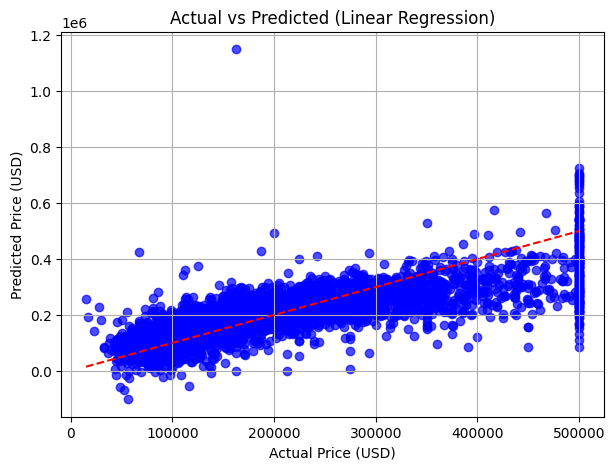

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test_usd, y_pred_lr_usd, alpha=0.7, color='blue')
plt.plot([y_test_usd.min(), y_test_usd.max()],
         [y_test_usd.min(), y_test_usd.max()],
         'r--')  # Ideal line
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Actual vs Predicted (Linear Regression)")
plt.grid(True)
plt.show()

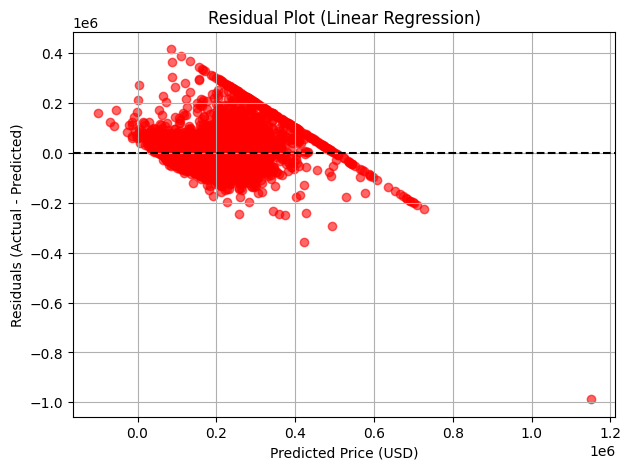

In [19]:
# Residuals = Actual - Predicted
residuals = y_test_usd - y_pred_lr_usd

plt.figure(figsize=(7,5))
plt.scatter(y_pred_lr_usd, residuals, alpha=0.6, color='red')
plt.axhline(y=0, color='black', linestyle='--')  # zero line
plt.xlabel("Predicted Price (USD)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Linear Regression)")
plt.grid(True)
plt.show()

In [20]:
# 3️⃣ Features and target
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 
        'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal']

In [21]:
# 4️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
# 5️⃣ Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestRegressor
# 7️⃣ Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train_scaled, y_train_usd)

,n_estimators,200
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
# 8️⃣ Predict on test set
y_pred_rf_usd = rf_model.predict(X_test_scaled)

In [30]:
# 9️⃣ Evaluate model
mse = mean_squared_error(y_test_usd, y_pred_rf_usd)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_usd, y_pred_rf_usd)
print("Random Forest Regression (Target in USD)")
print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.3f}")

Random Forest Regression (Target in USD)
MSE: 2549179187.68, RMSE: 50489.40, R²: 0.805


In [31]:
# 🔹 10️⃣ Compare first 10 houses
comparison = pd.DataFrame({
    'Actual_USD': y_test_usd.values[:10],
    'Predicted_RF_USD': y_pred_rf_usd[:10]
})
print("\nTop 10 Houses: Actual vs Predicted (USD)")
print(comparison)


Top 10 Houses: Actual vs Predicted (USD)
   Actual_USD  Predicted_RF_USD
0     47700.0      49598.223141
1     45800.0      73931.692969
2    500001.0     487723.175000
3    218600.0     254186.251948
4    278000.0     226611.252942
5    158700.0     165080.591908
6    198200.0     236895.416333
7    157500.0     166428.775316
8    340000.0     264395.717026
9    446600.0     489612.870000


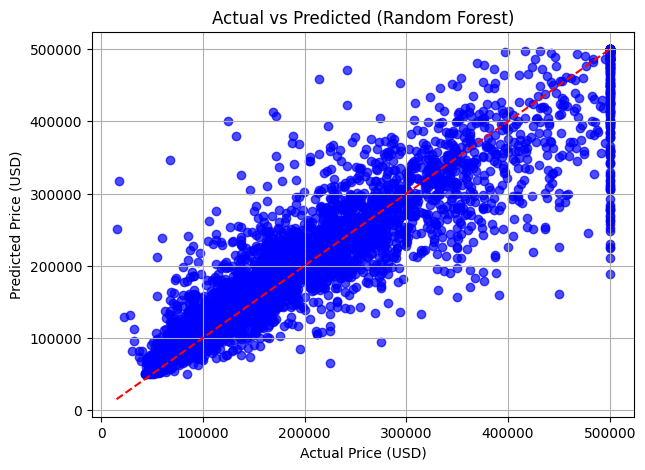

In [32]:
# 🔹 11️⃣ Plot Actual vs Predicted
plt.figure(figsize=(7,5))
plt.scatter(y_test_usd, y_pred_rf_usd, alpha=0.7, color='blue')
plt.plot([y_test_usd.min(), y_test_usd.max()],
         [y_test_usd.min(), y_test_usd.max()], 'r--')
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Actual vs Predicted (Random Forest)")
plt.grid(True)
plt.show()

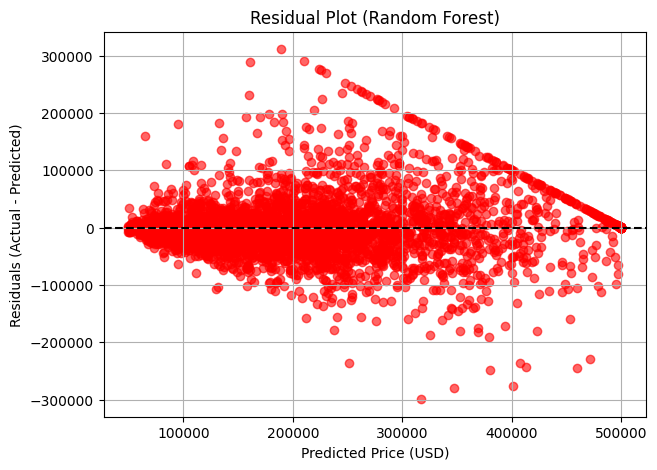

In [33]:
# 🔹 12️⃣ Residual Plot
residuals = y_test_usd - y_pred_rf_usd
plt.figure(figsize=(7,5))
plt.scatter(y_pred_rf_usd, residuals, alpha=0.6, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Price (USD)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (Random Forest)")
plt.grid(True)
plt.show()

In [34]:
#now compare the first 10 housevalues by Actual, Linear Regression and Random forest Regression
# Comparison: Actual vs LR vs RF
# -----------------------------

import pandas as pd

# Assume you have already:
# y_test_usd       -> Actual target in USD
# y_pred_lr_usd    -> Linear Regression predictions in USD
# y_pred_rf_usd    -> Random Forest predictions in USD

# Create comparison DataFrame for first 10 houses
comparison_top10 = pd.DataFrame({
    'Actual_USD': y_test_usd.values[:10],
    'Predicted_LR_USD': y_pred_lr_usd[:10],
    'Predicted_RF_USD': y_pred_rf_usd[:10]
})

# Display comparison
print("🔍 Top 10 Houses: Actual vs Predicted (LR vs RF)")
print(comparison_top10)

🔍 Top 10 Houses: Actual vs Predicted (LR vs RF)
   Actual_USD  Predicted_LR_USD  Predicted_RF_USD
0     47700.0      71912.284160      49598.223141
1     45800.0     176401.657066      73931.692969
2    500001.0     270965.883343     487723.175000
3    218600.0     283892.593018     254186.251948
4    278000.0     260465.725181     226611.252942
5    158700.0     201175.367325     165080.591908
6    198200.0     264550.004938     236895.416333
7    157500.0     216875.532129     166428.775316
8    340000.0     274074.644114     264395.717026
9    446600.0     391561.472503     489612.870000


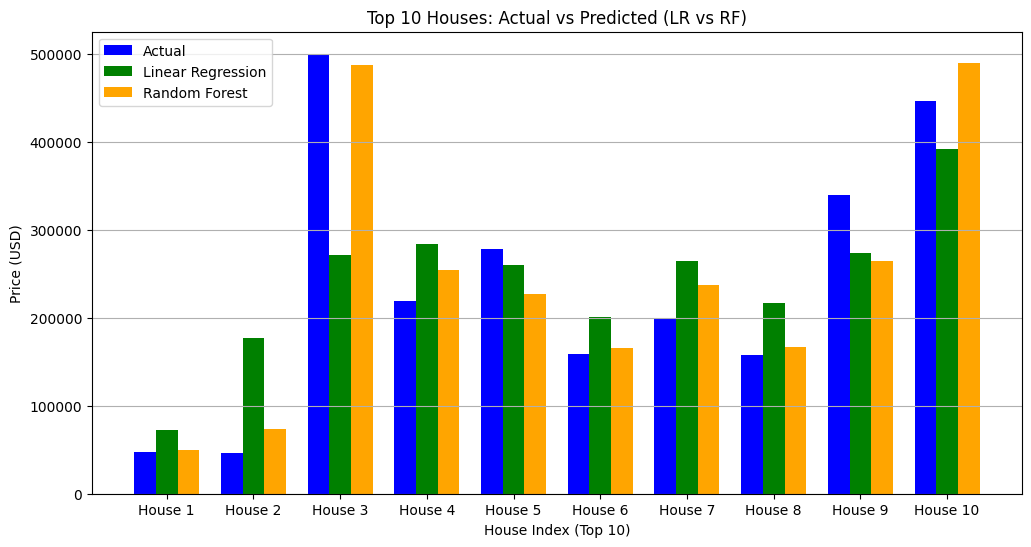

In [35]:
# -----------------------------
# Bar Plot: Actual vs LR vs RF (Top 10 houses)
# -----------------------------
import matplotlib.pyplot as plt
import numpy as np

# Indices for top 10 houses
indices = np.arange(10)

# Width of each bar
width = 0.25

plt.figure(figsize=(12,6))

# Plot Actual prices
plt.bar(indices - width, y_test_usd.values[:10], width=width, color='blue', label='Actual')

# Plot Linear Regression predictions
plt.bar(indices, y_pred_lr_usd[:10], width=width, color='green', label='Linear Regression')

# Plot Random Forest predictions
plt.bar(indices + width, y_pred_rf_usd[:10], width=width, color='orange', label='Random Forest')

plt.xlabel("House Index (Top 10)")
plt.ylabel("Price (USD)")
plt.title("Top 10 Houses: Actual vs Predicted (LR vs RF)")
plt.xticks(indices, [f"House {i+1}" for i in indices])
plt.legend()
plt.grid(axis='y')
plt.show()